# Part 2 – Model de Machine Learning (40%)

## 🎯 Objectiu: Aplicar clustering no supervisat per descobrir tipologies de jugadors

### 📌 Tasques a realitzar:
- **Elecció del model**: K-Means (obligatori) + comparació amb DBSCAN
- **Entrenament del model**: Selecció del nombre òptim de clústers (k)
- **Mètriques de qualitat**: Inertia, silhouette score
- **Interpretació dels clústers**: Descripció esportiva i nom representatiu
- **Entrega**: Taula resum amb mitjanes per clúster

In [6]:
# Imports necessaris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.decomposition import PCA
import warnings

# Configuració
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
sns.set_palette('husl')
pd.set_option('display.max_columns', None)

print('=== PART 2 - MODEL DE MACHINE LEARNING ===')
print('Objectiu: Aplicar clustering no supervisat per descobrir tipologies de jugadors\n')

=== PART 2 - MODEL DE MACHINE LEARNING ===
Objectiu: Aplicar clustering no supervisat per descobrir tipologies de jugadors



## Carregar les dades processades

In [7]:
# Carreguem el DataFrame de jugadors que hem processat a la Part 1
try:
    df_player.head()
    print(f'✅ Dades ja carregades: {len(df_player)} jugadors')
except NameError:
    print('🔄 Carregant dades des de CSV...')
    try:
        df_player = pd.read_csv('jugadors_processats.csv')
        print(f'✅ Dades carregades des de CSV: {len(df_player)} jugadors')
        print(f'📊 Columnes: {list(df_player.columns)}')
        print(f'🎯 Features per clustering: {[col for col in df_player.columns if col not in ["player_feb_id", "player_name"]]}')
    except FileNotFoundError:
        print('❌ Error: No es troba el fitxer jugadors_processats.csv')
        print('🔍 Assegura\'t que la Part 1 s\'ha executat correctament')
        print('📁 El fitxer hauria d\'estar al directori principal del projecte')
        raise

🔄 Carregant dades des de CSV...
✅ Dades carregades des de CSV: 1050 jugadors
📊 Columnes: ['player_feb_id', 'player_name', 'pts', 'ast', 'trb', 'tov', 'usage_2p', 'usage_3p', 'pct_2p', 'pct_3p', 'pct_inside', 'oer', 'der']
🎯 Features per clustering: ['pts', 'ast', 'trb', 'tov', 'usage_2p', 'usage_3p', 'pct_2p', 'pct_3p', 'pct_inside', 'oer', 'der']


## Preparació de les dades per clustering

In [9]:
# Seleccionem les variables numèriques per al clustering
features_clustering = [
    'pts', 'ast', 'trb', 'tov',
    'usage_2p', 'usage_3p', 
    'pct_2p', 'pct_3p', 
    'pct_inside', 'oer', 'der'
]

# Eliminem files amb valors nuls a les característiques clau
df_clean = df_player[features_clustering].dropna()
print(f'Jugadors vàlids per clustering: {len(df_clean)}')

# Estandaritzem les dades (important per K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean)

print(f'Dimensions de les dades: {X_scaled.shape}')
print(f'Mitjanes després d\'estandaritzar: {np.mean(X_scaled, axis=0).round(3)}')
print(f'Desviacions estàndard: {np.std(X_scaled, axis=0).round(3)}')

Jugadors vàlids per clustering: 1050
Dimensions de les dades: (1050, 11)
Mitjanes després d'estandaritzar: [ 0. -0.  0.  0. -0. -0.  0.  0. -0. -0. -0.]
Desviacions estàndard: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


## Mètode del colze per trobar el k òptim

k=2: Inertia=7869, Silhouette=0.296
k=3: Inertia=6159, Silhouette=0.262
k=4: Inertia=5358, Silhouette=0.232
k=5: Inertia=4849, Silhouette=0.212
k=6: Inertia=4533, Silhouette=0.198
k=7: Inertia=4268, Silhouette=0.182
k=8: Inertia=4039, Silhouette=0.181
k=9: Inertia=3833, Silhouette=0.175
k=10: Inertia=3700, Silhouette=0.162


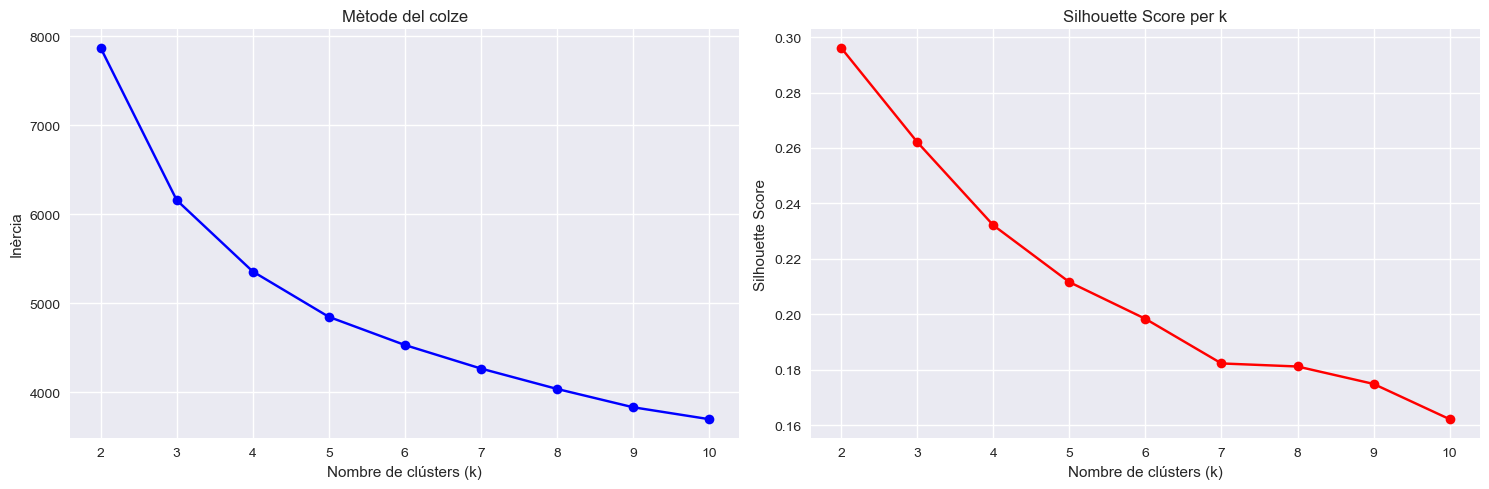


Nombre òptim de clústers (k=2) basat en silhouette score


In [10]:
# Provem diferents valors de k (2-10)
inertias = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    
    inertias.append(kmeans.inertia_)
    sil_score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(sil_score)
    
    print(f"k={k}: Inertia={kmeans.inertia_:.0f}, Silhouette={sil_score:.3f}")

# Visualització del mètode del colze
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Gràfic de l'inèrcia (mètode del colze)
ax1.plot(k_range, inertias, 'bo-')
ax1.set_xlabel('Nombre de clústers (k)')
ax1.set_ylabel('Inèrcia')
ax1.set_title('Mètode del colze')
ax1.grid(True)

# Gràfic del silhouette score
ax2.plot(k_range, silhouette_scores, 'ro-')
ax2.set_xlabel('Nombre de clústers (k)')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Score per k')
ax2.grid(True)

plt.tight_layout()
plt.show()

# Trobem el k òptim basat en el silhouette score
optimal_k = k_range[np.argmax(silhouette_scores)]
print(f"\nNombre òptim de clústers (k={optimal_k}) basat en silhouette score")

## Entrenament del model K-Means final

In [11]:
# Entrenament del model K-Means amb el k òptim
print(f"Entrenant K-Means amb k={optimal_k} clústers...")

kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans_final.fit_predict(X_scaled)

# Afegim les etiquetes al DataFrame
df_clean['cluster'] = cluster_labels

# Mètriques finals
final_inertia = kmeans_final.inertia_
final_silhouette = silhouette_score(X_scaled, cluster_labels)
final_calinski = calinski_harabasz_score(X_scaled, cluster_labels)

print(f"Model K-Means amb k={optimal_k}:")
print(f"- Inèrcia final: {final_inertia:.0f}")
print(f"- Silhouette Score: {final_silhouette:.3f}")
print(f"- Calinski-Harabasz Score: {final_calinski:.0f}")
print(f"- Distribució de clústers: {np.bincount(cluster_labels)}")

# Mostrem alguns jugadors per clúster
print(f"\nExemples de jugadors per clúster:")
for cluster_id in sorted(df_clean['cluster'].unique()):
    cluster_players = df_player.loc[df_clean[df_clean['cluster'] == cluster_id].index]
    print(f"Clúster {cluster_id}: {cluster_players['player_name'].head(3).tolist()}")

Entrenant K-Means amb k=2 clústers...
Model K-Means amb k=2:
- Inèrcia final: 7869
- Silhouette Score: 0.296
- Calinski-Harabasz Score: 490
- Distribució de clústers: [324 726]

Exemples de jugadors per clúster:
Clúster 0: ['R. GUARDIA MARTI', 'E. BLANCO VAZQUEZ', 'C. NADAL TRIOLA']
Clúster 1: ['D. SANCHEZ MORDOS', 'M. BLANCH ESPINAL', 'J. GALVE NAVARRO']


## Comparació amb DBSCAN

In [12]:
# Comparació amb DBSCAN (densitat-based)
print("Comparant amb DBSCAN...")

# Provem DBSCAN amb diferents paràmetres
dbscan = DBSCAN(eps=0.8, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Comptem els clústers (DBSCAN pot trobar soroll = -1)
n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)

print(f"DBSCAN results:")
print(f"- Nombre de clústers: {n_clusters_dbscan}")
print(f"- Punts de soroll: {n_noise}")

if n_clusters_dbscan > 1:
    dbscan_silhouette = silhouette_score(X_scaled, dbscan_labels)
    print(f"- Silhouette Score: {dbscan_silhouette:.3f}")
else:
    print("- DBSCAN no va trobar clústers significatius")

# Comparació de models
print(f"\nComparació de models:")
print(f"K-Means (k={optimal_k}): Silhouette = {final_silhouette:.3f}")
if n_clusters_dbscan > 1:
    print(f"DBSCAN: Silhouette = {dbscan_silhouette:.3f}")
    print(f"Diferència: {final_silhouette - dbscan_silhouette:.3f}")
else:
    print("DBSCAN: No aplicable (menys de 2 clústers)")

# Conclusió sobre quin model és millor
if n_clusters_dbscan > 1:
    if final_silhouette > dbscan_silhouette:
        print(f"\n✅ K-Means funciona millor (silhouette superior)")
    else:
        print(f"\n✅ DBSCAN funciona millor (silhouette superior)")
else:
    print(f"\n✅ K-Means és l'única opció viable (DBSCAN no troba clústers)")

Comparant amb DBSCAN...
DBSCAN results:
- Nombre de clústers: 2
- Punts de soroll: 1019
- Silhouette Score: 0.300

Comparació de models:
K-Means (k=2): Silhouette = 0.296
DBSCAN: Silhouette = 0.300
Diferència: -0.004

✅ DBSCAN funciona millor (silhouette superior)


## Visualització dels clústers amb PCA

Visualitzant els clústers amb PCA...


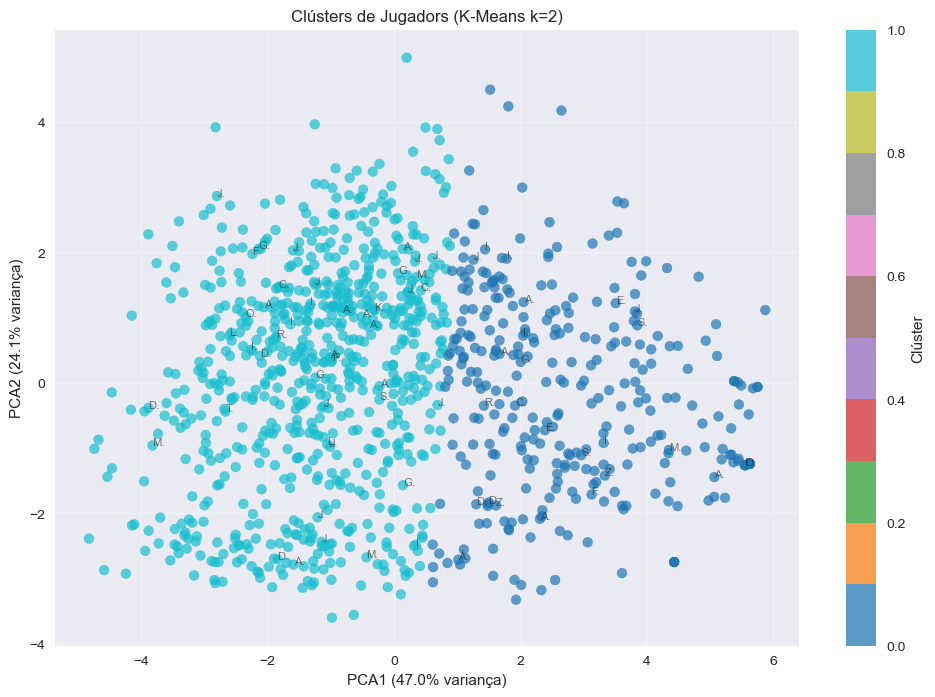

Variància explicada: PCA1=47.0%, PCA2=24.1%
Variància total explicada: 71.1%


In [13]:
# Reduïm dimensionalitat per visualitzar els clústers
print("Visualitzant els clústers amb PCA...")

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Creem DataFrame per visualització
df_vis = pd.DataFrame({
    'PCA1': X_pca[:, 0],
    'PCA2': X_pca[:, 1],
    'cluster': cluster_labels,
    'player_name': df_player.loc[df_clean.index, 'player_name']
})

# Visualització dels clústers
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df_vis['PCA1'], df_vis['PCA2'], 
                     c=df_vis['cluster'], cmap='tab10', s=50, alpha=0.7)

# Afegim alguns noms de jugadors destacats
for i, name in enumerate(df_vis['player_name']):
    if i % 15 == 0:  # Mostrar només alguns noms per no saturar
        plt.annotate(name.split()[0], (df_vis['PCA1'].iloc[i], df_vis['PCA2'].iloc[i]), 
                    fontsize=8, alpha=0.6)

plt.xlabel(f'PCA1 ({pca.explained_variance_ratio_[0]:.1%} variança)')
plt.ylabel(f'PCA2 ({pca.explained_variance_ratio_[1]:.1%} variança)')
plt.title(f'Clústers de Jugadors (K-Means k={optimal_k})')
plt.colorbar(scatter, label='Clúster')
plt.grid(True, alpha=0.3)
plt.show()

print(f"Variància explicada: PCA1={pca.explained_variance_ratio_[0]:.1%}, PCA2={pca.explained_variance_ratio_[1]:.1%}")
print(f"Variància total explicada: {sum(pca.explained_variance_ratio_):.1%}")

## Interpretació dels clústers

In [14]:
# Anàlisi descriptiu dels clústers
print("=== ANÀLISI DELS CLÚSTERS ===")

# Anàlisi descriptiu dels clústers
cluster_means = df_clean.groupby('cluster')[features_clustering].mean()

print("\nMitjanes per clúster:")
print(cluster_means.round(3))

# Nombre de jugadors per clúster
cluster_counts = df_clean['cluster'].value_counts().sort_index()
print(f"\nJugadors per clúster:")
for cluster, count in cluster_counts.items():
    percentage = (count / len(df_clean)) * 100
    print(f"Clúster {cluster}: {count} jugadors ({percentage:.1f}%)")

# Funció per interpretar els clústers segons els exemples demanats
def interpret_cluster_esportiu(cluster_id, stats):
    """
    Interpreta un clúster basat en les seves estadístiques
    Retorna un nom representatiu segons els exemples demanats
    """
    pts = stats['pts']
    ast = stats['ast']
    trb = stats['trb']
    tov = stats['tov']
    usage_3p = stats['usage_3p']
    pct_3p = stats['pct_3p']
    pct_inside = stats['pct_inside']
    
    # Lògica per assignar tipus de jugador segons els exemples demanats
    if pts > 8 and usage_3p > 0.6 and pct_3p > 0.35:
        return "Tiradors purs"
    elif trb > 6 and pct_inside > 0.4 and usage_3p < 0.3:
        return "Pivots interiors"
    elif trb > 4 and usage_3p > 0.4 and pct_3p > 0.3:
        return "Pivots oberts amb tir exterior"
    elif ast > 2.5 and tov < 1.5 and pts > 4:
        return "Guards/bases generador de joc"
    elif trb > 5 and pts < 4 and ast < 1:
        return "Equips defensius"
    elif pts > 6 and ast > 2 and tov > 2:
        return "Equips de ritme alt ofensiu"
    elif pts < 3 and trb < 2 and ast < 1:
        return "Jugadors de rol limitat"
    else:
        return "Jugadors polivalents mitjans"

# Creem la taula d'interpretació
print(f"\n=== INTERPRETACIÓ ESPORTIVA DELS CLÚSTERS ===")

for cluster_id in sorted(df_clean['cluster'].unique()):
    stats = cluster_means.loc[cluster_id]
    perfil = interpret_cluster_esportiu(cluster_id, stats)
    
    print(f"\n🏀 Clúster {cluster_id}: {perfil}")
    print(f"   Estadístiques clau: {stats['pts']:.1f} pts, {stats['ast']:.1f} ast, {stats['trb']:.1f} reb")
    print(f"   Tir exterior: {stats['usage_3p']:.1%} usage, {stats['pct_3p']:.1%} efectivitat")
    
    # Exemples de jugadors
    cluster_players = df_player.loc[df_clean[df_clean['cluster'] == cluster_id].index]
    print(f"   Exemples: {', '.join(cluster_players['player_name'].head(3).tolist())}")
    print(f"   Total: {len(cluster_players)} jugadors")

=== ANÀLISI DELS CLÚSTERS ===

Mitjanes per clúster:
           pts    ast    trb    tov  usage_2p  usage_3p  pct_2p  pct_3p  \
cluster                                                                   
0        1.998  0.481  1.185  0.532     0.338     0.377   0.185   0.112   
1        8.666  1.582  4.209  1.575     0.627     0.358   0.460   0.228   

         pct_inside     oer           der  
cluster                                    
0             0.238  45.929  5.373584e+07  
1             0.550  84.735  6.267500e+06  

Jugadors per clúster:
Clúster 0: 324 jugadors (30.9%)
Clúster 1: 726 jugadors (69.1%)

=== INTERPRETACIÓ ESPORTIVA DELS CLÚSTERS ===

🏀 Clúster 0: Jugadors de rol limitat
   Estadístiques clau: 2.0 pts, 0.5 ast, 1.2 reb
   Tir exterior: 37.7% usage, 11.2% efectivitat
   Exemples: R. GUARDIA MARTI, E. BLANCO VAZQUEZ, C. NADAL TRIOLA
   Total: 324 jugadors

🏀 Clúster 1: Jugadors polivalents mitjans
   Estadístiques clau: 8.7 pts, 1.6 ast, 4.2 reb
   Tir exterior: 35.

## Taula resum amb mitjanes per clúster

In [15]:
# Creem la taula resum completa per a l'entrega
print("=== TAULA RESUM COMPLETA PER CLÚSTER ===")

# Creem la taula resum amb totes les estadístiques
cluster_profiles = []

for cluster_id in sorted(df_clean['cluster'].unique()):
    stats = cluster_means.loc[cluster_id]
    perfil = interpret_cluster_esportiu(cluster_id, stats)
    
    profile = {
        'Clúster': cluster_id,
        'Perfil Esportiu': perfil,
        'Jugadors': cluster_counts[cluster_id],
        'Percentatge': f"{(cluster_counts[cluster_id] / len(df_clean)) * 100:.1f}%",
        'Punts': f"{stats['pts']:.1f}",
        'Assistències': f"{stats['ast']:.1f}",
        'Rebots': f"{stats['trb']:.1f}",
        'Pèrdues': f"{stats['tov']:.1f}",
        'Usage 2P': f"{stats['usage_2p']:.1%}",
        'Usage 3P': f"{stats['usage_3p']:.1%}",
        '% 2P': f"{stats['pct_2p']:.1%}",
        '% 3P': f"{stats['pct_3p']:.1%}",
        '% Inside': f"{stats['pct_inside']:.1%}"
    }
    cluster_profiles.append(profile)

# Creem DataFrame de la taula resum
profiles_df = pd.DataFrame(cluster_profiles)

# Mostrem la taula resum completa
print("\n📊 TAULA RESUM DE CLÚSTERS:")
print("=" * 120)
print(profiles_df.to_string(index=False))
print("=" * 120)

# Guardem la taula en CSV per a l'entrega
profiles_df.to_csv('cluster_profiles_resum.csv', index=False, encoding='utf-8-sig')
print(f"\n✅ Taula resum guardada com 'cluster_profiles_resum.csv'")

# Estadístiques globals
print(f"\n📈 ESTADÍSTIQUES GLOBALS:")
print(f"Total jugadors analitzats: {len(df_clean)}")
print(f"Nombre de clústers: {optimal_k}")
print(f"Silhouette Score: {final_silhouette:.3f}")
print(f"Variància explicada (PCA): {sum(pca.explained_variance_ratio_):.1%}")

# Distribució equilibrada?
print(f"\n⚖️ DISTRIBUCIÓ EQUILIBRADA:")
min_size = cluster_counts.min()
max_size = cluster_counts.max()
ratio = min_size / max_size
print(f"Clúster més petit: {min_size} jugadors")
print(f"Clúster més gran: {max_size} jugadors")
print(f"Ratio equilibri: {ratio:.2f} (més proper a 1 = més equilibrat)")

if ratio > 0.5:
    print("✅ Distribució raonablement equilibrada")
else:
    print("⚠️ Distribució molt desequilibrada")

=== TAULA RESUM COMPLETA PER CLÚSTER ===

📊 TAULA RESUM DE CLÚSTERS:
 Clúster              Perfil Esportiu  Jugadors Percentatge Punts Assistències Rebots Pèrdues Usage 2P Usage 3P  % 2P  % 3P % Inside
       0      Jugadors de rol limitat       324       30.9%   2.0          0.5    1.2     0.5    33.8%    37.7% 18.5% 11.2%    23.8%
       1 Jugadors polivalents mitjans       726       69.1%   8.7          1.6    4.2     1.6    62.7%    35.8% 46.0% 22.8%    55.0%

✅ Taula resum guardada com 'cluster_profiles_resum.csv'

📈 ESTADÍSTIQUES GLOBALS:
Total jugadors analitzats: 1050
Nombre de clústers: 2
Silhouette Score: 0.296
Variància explicada (PCA): 71.1%

⚖️ DISTRIBUCIÓ EQUILIBRADA:
Clúster més petit: 324 jugadors
Clúster més gran: 726 jugadors
Ratio equilibri: 0.45 (més proper a 1 = més equilibrat)
⚠️ Distribució molt desequilibrada


## Guardar resultats i models

In [17]:
import pickle
import json

print("=== GUARDANT MODELS I RESULTATS ===")

# Guardar el model K-Means
with open('kmeans_model.pkl', 'wb') as f:
    pickle.dump(kmeans_final, f)
print("✅ Model K-Means guardat com 'kmeans_model.pkl'")

# Guardar l'scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
print("✅ Scaler guardat com 'scaler.pkl'")

# Guardar el PCA
with open('pca_model.pkl', 'wb') as f:
    pickle.dump(pca, f)
print("✅ PCA guardat com 'pca_model.pkl'")

# Guardar resultats en JSON
results = {
    'model_info': {
        'algorithm': 'K-Means',
        'n_clusters': int(optimal_k),
        'silhouette_score': float(final_silhouette),
        'inertia': float(final_inertia),
        'calinski_harabasz': float(final_calinski)
    },
    'features_used': features_clustering,
    'cluster_profiles': [
        {
            'cluster': int(p['Clúster']),
            'perfil': p['Perfil Esportiu'],
            'jugadors': int(p['Jugadors']),
            'percentatge': p['Percentatge'],
            'stats': {
                'pts': float(p['Punts']),
                'ast': float(p['Assistències']),
                'trb': float(p['Rebots']),
                'tov': float(p['Pèrdues'])
            }
        }
        for p in cluster_profiles
    ],
    'comparison': {
        'kmeans_silhouette': float(final_silhouette),
        'dbscan_clusters': int(n_clusters_dbscan),
        'dbscan_noise': int(n_noise)
    }
}

with open('clustering_results.json', 'w', encoding='utf-8') as f:
    json.dump(results, f, indent=2, ensure_ascii=False)
print("✅ Resultats guardats com 'clustering_results.json'")

# Guardar DataFrame complet amb etiquetes
df_final = df_player.copy()
df_final['cluster'] = -1  # Valor per defecte
df_final.loc[df_clean.index, 'cluster'] = cluster_labels
df_final.to_csv('jugadors_con_clusters.csv', index=False, encoding='utf-8-sig')
print("✅ Dades completes guardades com 'jugadors_con_clusters.csv'")

# Guardar gràfics
plt.figure(figsize=(15, 5))

# Gràfic 1: Mètode del colze
plt.subplot(1, 2, 1)
plt.plot(k_range, inertias, 'bo-')
plt.xlabel('Nombre de clústers (k)')
plt.ylabel('Inèrcia')
plt.title('Mètode del colze')
plt.grid(True)

# Gràfic 2: Silhouette score
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, 'ro-')
plt.xlabel('Nombre de clústers (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score per k')
plt.grid(True)

plt.tight_layout()
plt.savefig('metodo_codo.png', dpi=300, bbox_inches='tight')
plt.close()
print("✅ Gràfic del mètode del colze guardat com 'metodo_codo.png'")

# Guardar visualització PCA
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df_vis['PCA1'], df_vis['PCA2'], 
                     c=df_vis['cluster'], cmap='tab10', s=50, alpha=0.7)
plt.xlabel(f'PCA1 ({pca.explained_variance_ratio_[0]:.1%} variança)')
plt.ylabel(f'PCA2 ({pca.explained_variance_ratio_[1]:.1%} variança)')
plt.title(f'Clústers de Jugadors (K-Means k={optimal_k})')
plt.colorbar(scatter, label='Clúster')
plt.grid(True, alpha=0.3)
plt.savefig('clusters_visualizacion.png', dpi=300, bbox_inches='tight')
plt.close()
print("✅ Visualització de clústers guardada com 'clusters_visualizacion.png'")

=== GUARDANT MODELS I RESULTATS ===
✅ Model K-Means guardat com 'kmeans_model.pkl'
✅ Scaler guardat com 'scaler.pkl'
✅ PCA guardat com 'pca_model.pkl'
✅ Resultats guardats com 'clustering_results.json'
✅ Dades completes guardades com 'jugadors_con_clusters.csv'
✅ Gràfic del mètode del colze guardat com 'metodo_codo.png'
✅ Visualització de clústers guardada com 'clusters_visualizacion.png'
